## Name: Margaret Nguyen

# Project Overview: Analysis of Data Analyst Job Postings in New York  

*The Data Analyst role has been in high demand in the job market. However, it's essential to understand the overall job titles and company distributions with average hourly and annual income, as well as the most sought-after skills and qualifications for data analysts in today's market. As a data analytics student, I want to undertake this project for my own benefit and provide valuable insights to people like me who are embarking on their journey of searching for data analyst jobs.*

**In this coding project, my main goal is to extract data analyst job listings from Indeed.com, specifically targeting 100 pages in New York. Additionally, I will create an informative Tableau dashboard that presents job titles, company distribution, average hourly and yearly earnings, and the key skills and qualifications in high demand for data analysts in today's job market.**

- **To download Chromedriver, you can use the [following link](https://googlechromelabs.github.io/chrome-for-testing/).**

# I. Web scraping job postings from Indeed.com

In [1]:
# Import packages
import pandas as pd  # v 1.4.4
import numpy as np # v 1.21.5
from selenium import webdriver # v 4.9.0
from selenium.webdriver.chrome.service import Service # v 4.9.0
from selenium.webdriver.common.by import By # v 4.9.0
from selenium.common.exceptions import NoSuchElementException # v 4.9.0
import re, time, random
import traceback
import warnings # v 1.0.1
import matplotlib.pyplot as plt # v 3.5.2

## A. Create function to scrape one page 

In [240]:
def get_job_postings():
    num_list = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
    job_postings = []

    for i in num_list:
        try:
            job_card = driver.find_element('xpath', '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div/div'.format(i))

            # Get job title
            job_title_element = job_card.find_element('xpath', './/table[1]/tbody/tr/td/div[1]/h2/a/span')
            job_title = job_title_element.text.replace('\n', '').strip()

            # Get company name
            company_element = job_card.find_element('xpath', './/table[1]/tbody/tr/td/div[2]/div/span')
            company_name = company_element.text.replace('\n', '').strip()

            # Get job location
            job_location_element = job_card.find_element('xpath', './/table[1]/tbody/tr/td/div[2]/div/div')
            job_location = job_location_element.text.replace('\n', '').strip()

            # Get job description
            job_description_element = job_card.find_element('xpath', './/table[2]/tbody/tr[2]/td/div/div/ul')
            job_description = job_description_element.text.replace('\n', '').strip()

            # Get salary (if available)
            try:
                salary_element = job_card.find_element('xpath', './/table[1]/tbody/tr/td/div[3]/div[1]')
                salary = salary_element.text.replace('\n', '').strip()
            except NoSuchElementException:
                salary = 'NaN'

            # Get job_type (if available)
            try:
                job_type_element = job_card.find_element('xpath', './/table[1]/tbody/tr/td/div[3]/div[2]')
                job_type = job_type_element.text.replace('\n', '').strip()
            except NoSuchElementException:
                job_type = 'NaN'

            # Append job posting details to the list
            job_postings.append([job_title, company_name, job_description, job_location, salary, job_type])

        except NoSuchElementException:
            # Handle the case where a job card is not found
            pass

    return job_postings

## B. Scrape multiple pages

In [243]:
# Define a Service object with the path to the ChromeDriver executable
chrome_driver_path = "/Users/margaret06/Downloads/chromedriver-mac-arm64/chromedriver"
service = Service(chrome_driver_path)

# Define an empty dataframe that will be populated
df_out = pd.DataFrame()

for j in range(0, 1000, 10):
    # Use the Service object when initializing the Chrome WebDriver
    driver = webdriver.Chrome(service=service)
    driver.get('https://www.indeed.com/jobs?q=data+analyst&l=New+York%2C+NY&radius=50&start={}'.format(j))

    try:
        # Scraping a single page (assuming get_job_postings() is defined elsewhere)
        job_post = get_job_postings()
        # Make a dataframe
        df_single = pd.DataFrame(job_post, columns=['Job title', 'Company name', 'Job description', 'Job location', 'Salary', 'Job type'])
        # Append data to df_out
        df_out = pd.concat([df_out, df_single])
    except Exception as e:
        print(traceback.format_exc())
    
    # Close the current browser, since a new one will open in the next iteration
    driver.quit()
    
    # Wait for a random duration of time between 3 and 4 seconds before going to the next page
    time.sleep(random.uniform(3, 4))

# Reset the index
df_out = df_out.reset_index(drop=True)

In [244]:
# Print the length of the dataframe
print(len(df_out))

# View the dataframe
df_out.head()

1305


,Job title,Company name,Job description,Job location,Salary,Job type
0,Data Analyst,Ramaz School,"Analyze, audit and modify data to assure data ...","New York, NY 10075 (Upper East Side area)","$65,000 - $75,000 a year",Full-time
1,Program Data Support Analyst,Goodwin Recruiting,Load monthly reports to data processing tools ...,,"$100,000 - $150,000 a year",NaN
2,Jr SQL Dev/Dev Ops/BA/Data Engineering,VForce InfoTech,H1B TRANSFER AND GC FILING WITH THE BEST BILLI...,"Hybrid remote in Edison, NJ 08837","$60,000 - $100,000 a year",Full-time
3,Data Analyst,Columbia University,The successful candidate will be detail-orient...,"New York, NY","$78,000 - $80,000 a year",Full-time
4,Data Analyst I-Transgender Program-Mount Sinai...,Mount Sinai,Assists in the development of data management ...,"New York, NY 10011 (Chelsea area)","$58,661 - $74,250 a year",Full-time


**Save the scraped data in case it is lost**

In [245]:
# Assuming 'data' is a subdirectory in your current working directory
folder_path = 'data/'
file_name = 'df_job.csv'

# Combine the folder path and file name to create the full file path
full_file_path = folder_path + file_name

# Export dataframe to csv file
df_out.to_csv(full_file_path, index=True)

# II. Data analyzing

In [3]:
# Copy df_out as df_job
df_job = df_out.copy()

In [5]:
# Ignore warning
pd.options.mode.chained_assignment = None

# Drop companies that posted same multiple job postings
df_job = df_job.drop_duplicates()

# Clean data 
df_job['Salary'] = df_job['Salary'].str.replace(',', '')
df_job['Salary'] = df_job['Salary'].str.replace('$', '', regex=False)
df_job['Salary'] = df_job['Salary'].str.replace('Pay information not provided', 'NaN')
df_job['Salary'] = df_job['Salary'].str.split('+').str[0]
df_job['Job type'] = df_job['Job type'].str.split('+').str[0]

# Revert to the default warning behavior
pd.options.mode.chained_assignment = 'warn'

In [6]:
# Ignore warning
pd.options.mode.chained_assignment = None

# Define a function to conditionally fill in 'Job type' based on 'Salary'
def fill_job_type(row):
    if row['Salary'] == 'Contract':
        return 'Contract'
    elif row['Salary'] == 'Full-time':
        return 'Full-time'
    elif row['Salary'] == 'Part-time':
        return 'Part-time'
    elif row['Salary'] == 'Temporary':
        return 'Temporary'
    else:
        return row['Job type']

# Apply the function to update 'Job type' column
df_job['Job type'] = df_job.apply(fill_job_type, axis=1)

# Replace specific values with NaN in the 'Job type' column
df_job['Job type'].replace({None: np.nan}, inplace=True)

# Define a function to replace 'Health insurance' with NaN in the 'Job type' column
def replace_health_insurance(x):
    if isinstance(x, str) and 'Health insurance' in x:
        return np.nan
    return x

# Apply the custom function to the 'Job type' column
df_job['Job type'] = df_job['Job type'].apply(replace_health_insurance)

# Revert to the default warning behavior
pd.options.mode.chained_assignment = 'warn'

In [7]:
# Ignore warning
pd.options.mode.chained_assignment = None

# Define a function to conditionally replace job type in Salary column with NaN
def fill_salary(row):
    if row['Salary'] == 'Contract':
        return np.nan
    elif row['Salary'] == 'Full-time':
        return np.nan
    elif row['Salary'] == 'Part-time':
        return np.nan
    elif row['Salary'] == 'Temporary':
        return np.nan
    else:
        return row['Salary']

# Apply the function to update 'Salary' column
df_job['Salary'] = df_job.apply(fill_salary, axis=1)   

# Revert to the default warning behavior
pd.options.mode.chained_assignment = 'warn'

In [8]:
# Ignore warning
pd.options.mode.chained_assignment = None

def replace_K_with_00(sentence):
    if isinstance(sentence, str):
        if '.' in sentence:
            sentence = re.sub(r'(\d+\.\d+)K', lambda match: match.group(1).replace('.', '') + '00', sentence)
        sentence = re.sub(r'(\d+)K', lambda match: match.group(1) + '000', sentence)
    return sentence

# Apply the function to the 'Salary' column
df_job['Salary'] = df_job['Salary'].apply(replace_K_with_00)

# Remove white space
df_job['Salary'] = df_job['Salary'].str.strip()

# Revert to the default warning behavior
pd.options.mode.chained_assignment = 'warn'

In [9]:
# Reset index
df_job.reset_index(drop=True, inplace=True)

# Create job category
pattern = r'(data\s*modeling\s*analyst|compliance\s*risk\s*business\s*analyst|healthcare\s*data\s*analyst|' \
          r'product\s*analyst|data\s*science\s*analyst|financial\s*data\s*analyst|systems\s*analyst|project\s*analyst|' \
          r'financial\s*analyst|investment\s*data\s*analyst|inventory\s*analyst|digital\s*analyst|operations\s*analyst|' \
          r'business\s*data\s*analyst|it\s*business\s*analyst|business\s*analyst|hr\s*analyst|strategy\s*analyst' \
          r'marketing\s*data\s*analyst|marketing\s*analyst|bi\s*analyst|business\s*intelligence\s*analyst|' \
          r'data\s*equity\s*analyst|research\s*analyst|data\s*integrator\s*analyst|data\s*scientist|' \
          r'sales\s*analyst|data\s*science\s*analyst|digital\s*business\s*analyst|portfolio\s*performance\s*analyst|' \
          r'it\s*data\s*analyst|it\s*analyst|data\s*integrity\s*analyst|data\s*analyst|audit\s*data\s*analyst|'\
          r'business\s*intelligence\s*specialist|data\s*strategist|data\s*specialist|analyst|analytics|'\
          r'data\s*visualization\s*specialist|data\s*management\s*specialist|business\s*intelligence|'\
          r'engineer|engineering)'

df_job['Category'] = df_job['Job title'].str.lower().str.extract(pattern, flags=re.IGNORECASE)
df_job['Category'] = df_job['Category'].str.replace('bi analyst', 'business intelligence analyst')
df_job['Category'] = df_job['Category'].str.replace('financial data analyst', 'financial analyst')
df_job['Category'] = df_job['Category'].str.replace('business data analyst', 'business analyst')
df_job['Category'] = df_job['Category'].str.replace('it data analyst', 'it analyst')
df_job['Category'] = df_job['Category'].str.replace('analytics', 'analyst')
df_job['Category'] = df_job['Category'].str.replace('marketing data analyst', 'marketing analyst')

# Print shape of dataframe
print(df_job.shape)

# View dataframe
df_job.head()

(551, 7)


,Job title,Company name,Job description,Job location,Salary,Job type,Category
0,Data Analyst,Ramaz School,"Analyze, audit and modify data to assure data ...","New York, NY 10075 (Upper East Side area)",65000 - 75000 a year,Full-time,data analyst
1,Program Data Support Analyst,Goodwin Recruiting,Load monthly reports to data processing tools ...,NaN,100000 - 150000 a year,NaN,analyst
2,Jr SQL Dev/Dev Ops/BA/Data Engineering,VForce InfoTech,H1B TRANSFER AND GC FILING WITH THE BEST BILLI...,"Hybrid remote in Edison, NJ 08837",60000 - 100000 a year,Full-time,engineer
3,Data Analyst,Columbia University,The successful candidate will be detail-orient...,"New York, NY",78000 - 80000 a year,Full-time,data analyst
4,Data Analyst I-Transgender Program-Mount Sinai...,Mount Sinai,Assists in the development of data management ...,"New York, NY 10011 (Chelsea area)",58661 - 74250 a year,Full-time,data analyst


# Table 1: Companies that are hiring the most for the given job titles and locations

In [10]:
# Identify which companies are hiring the most for the given job titles and locations.
# Copy df_job, store df1
df1 = df_job.copy()

df1['Company name'].unique()

# Drop missing values in Company name
df1 = df1.dropna(subset=['Company name']).reset_index(drop=True)

# Calculate company counts
company_counts = df1['Company name'].value_counts()

# Add 'Company count' column to the DataFrame
df1['Company count'] = df1['Company name'].map(company_counts)
df1 = pd.DataFrame(df1)

# Sort DataFrame by 'Company count' in descending order
df1 = df1.sort_values('Company count', ascending=False)

# Display top companies
df_company = df1[['Company name', 'Company count']].drop_duplicates('Company name').reset_index(drop=True).head(10)

# Drop rows where 'Company name' is an empty string
df_company = df_company[df_company['Company name'] != '']

# View dataframe
df_company

,Company name,Company count
0,NYC Careers,23
1,"Fiserv, Inc.",8
2,Suburban Propane,7
3,Cognizant Technology Solutions,6
4,Horizon Blue Cross Blue Shield of New Jersey,6
5,NYU Langone,6
6,InfoQuest Consulting Group Inc.,6
7,ZT Systems,6
8,Zettalogix,6
9,Hackensack Meridian Health,5


In [11]:
# Determine the distribution of job titles and their average salaries.
# Copy df_job, store df2
df2 = df_job.copy()

# There are two salary types, including 'hour' and 'salary'
# Extract 'Salary type' using regular expression
df2['Salary type'] = df2['Salary'].str.extract(r'(\bhour\b|\byear\b)', flags=re.IGNORECASE)
df2['Salary type'] = df2['Salary type'].str.strip()

# Drop missing values in salary
df2 = df2.dropna(subset=['Salary type']).reset_index(drop=True)

# Get a subset of df2 that only includes "hour" salary type 
df_hour = df2[df2["Salary type"]=="hour"].reset_index(drop=True)

# Get a subset of df2 that only includes "year" salary type 
df_year = df2[df2["Salary type"]=="year"].reset_index(drop=True)

In [12]:
# View df_hour
df_hour.head()

,Job title,Company name,Job description,Job location,Salary,Job type,Category,Salary type
0,Big Data Analyst (Temporary),A+E Networks,Experience in data management and data governa...,"New York, NY",100 an hour,Full-time,data analyst,hour
1,"Business Data and Reporting Analyst, Level 1",The City University of New York (CUNY),Ability to review data and make decisions on l...,"Hybrid remote in Staten Island, NY",21.30 an hour,Part-time,analyst,hour
2,Business Analyst,DONIA LLC,Summary: *We are seeking a Business Analyst to...,"Long Island City, NY 11101",45 - 60 an hour,Full-time,business analyst,hour
3,Data Analyst,CCI Inc.,Validate and clean data to remediate erroneous...,"New York, NY 10036 (Midtown area)",34.82 an hour,Full-time,data analyst,hour
4,HXGN EAM DATA ANALYST -Hybrid,Aries Solutions,Review legacy system data and provide mapping ...,"Hybrid remote in New York, NY 11691",55 - 60 an hour,Full-time,data analyst,hour


In [13]:
# View df_year
df_year.head()

,Job title,Company name,Job description,Job location,Salary,Job type,Category,Salary type
0,Data Analyst,Ramaz School,"Analyze, audit and modify data to assure data ...","New York, NY 10075 (Upper East Side area)",65000 - 75000 a year,Full-time,data analyst,year
1,Program Data Support Analyst,Goodwin Recruiting,Load monthly reports to data processing tools ...,NaN,100000 - 150000 a year,NaN,analyst,year
2,Jr SQL Dev/Dev Ops/BA/Data Engineering,VForce InfoTech,H1B TRANSFER AND GC FILING WITH THE BEST BILLI...,"Hybrid remote in Edison, NJ 08837",60000 - 100000 a year,Full-time,engineer,year
3,Data Analyst,Columbia University,The successful candidate will be detail-orient...,"New York, NY",78000 - 80000 a year,Full-time,data analyst,year
4,Data Analyst I-Transgender Program-Mount Sinai...,Mount Sinai,Assists in the development of data management ...,"New York, NY 10011 (Chelsea area)",58661 - 74250 a year,Full-time,data analyst,year


# Table 2: The distribution of job category and their average annual salaries

In [14]:
# SALARY TYPE: YEAR
df_year['Salary fixed'] = df_year['Salary'].apply(lambda x: re.sub(r'Estimated', '', x))  # remove "Estimated"
df_year['Salary fixed'] = df_year['Salary fixed'].apply(lambda x: re.findall(r'\d+', x))  # extract numerical values
df_year['Salary fixed'] = df_year['Salary fixed'].apply(lambda x: [int(val) for val in x])  # convert to numeric format

# Calculate the average salary for each job title
df_year['Average annual salary'] = df_year['Salary fixed'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# Create subset 
df_year.drop(columns='Salary fixed', inplace=True)

# Determine the distribution of job category and their average salaries.
df_category_annual_salary = df_year.groupby('Category')['Average annual salary'].mean().round(2)
df_category_annual_salary = pd.DataFrame(df_category_annual_salary)
df_category_annual_salary = df_category_annual_salary.sort_values('Average annual salary', ascending=False)
df_category_annual_salary

,Average annual salary
Category,
business intelligence specialist,199550.00
data strategist,117500.00
data science analyst,109615.00
business intelligence analyst,109178.57
business intelligence,108000.00
engineer,102810.00
systems analyst,101102.50
it business analyst,100921.67
business analyst,99625.08


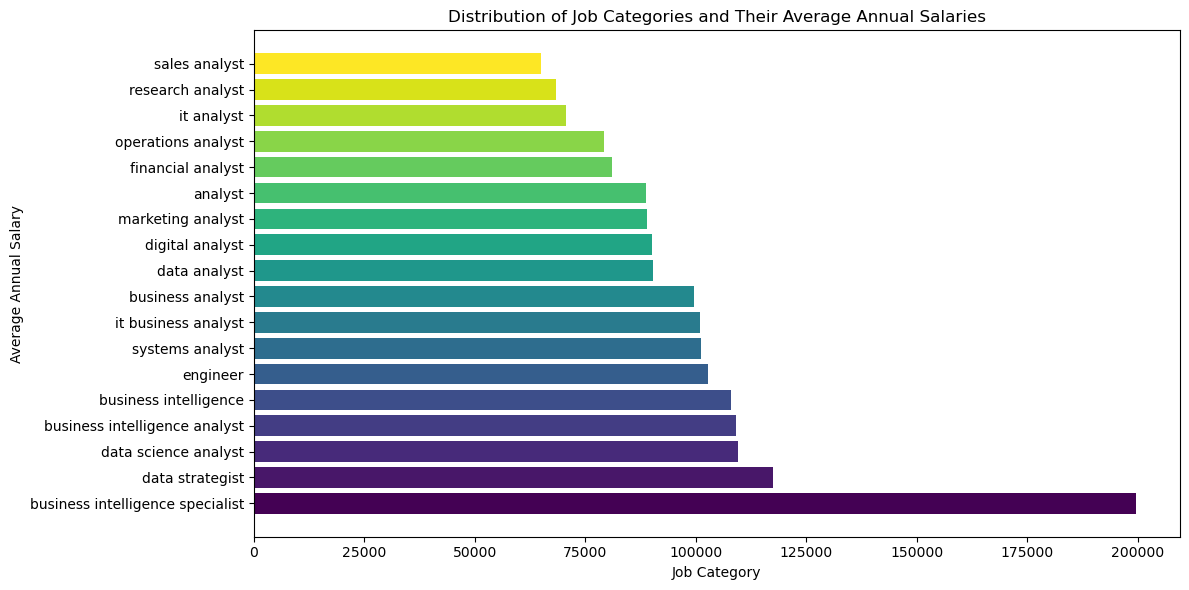

In [26]:
# Define the figure size
plt.figure(figsize=(12, 6))

# Define a color scheme for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(df_category_annual_salary)))

# Plot the bar chart
plt.barh(df_category_annual_salary.index, df_category_annual_salary['Average annual salary'], color=colors)
plt.xlabel('Job Category')
plt.ylabel('Average Annual Salary')
plt.title('Distribution of Job Categories and Their Average Annual Salaries')
plt.xticks() 

# Show the plot
plt.tight_layout()
plt.show()

# Table 3: The distribution of companies and their average annual salaries

In [29]:
# Determine the distribution of company and their average annual salaries.
df_company_annual_salary = df_year.groupby('Company name')['Average annual salary'].mean().round(2)
df_company_annual_salary = pd.DataFrame(df_company_annual_salary)
df_company_annual_salary = df_company_annual_salary.sort_values('Average annual salary', ascending=False)

# View dataframe
df_company_annual_salary.head(10)

,Average annual salary
Company name,
TD Witz Associates,200000.0
Duolingo,199550.0
Treliant LLC,195000.0
Meta,175500.0
Citi,172015.0
Inclusively,165000.0
Dandy,162500.0
Walmart,162000.0
BNP Paribas,158500.0


# Table 4: The distribution of job category and their average hourly salaries

In [17]:
# SALARY TYPE: HOUR 
# Remove 'an hour' from the 'Salary' column
df_hour['Salary fixed'] = df_hour['Salary'].str.replace(' an hour', '')
df_hour['Salary fixed'] = df_hour['Salary fixed'].apply(lambda x: re.sub(r'Up to', '', x))  # remove "Up to"
df_hour['Salary fixed'] = df_hour['Salary fixed'].apply(lambda x: re.sub(r'From', '', x))  # remove "From"

# Extract the salary range and convert it to a list of floats
df_hour['Salary fixed'] = df_hour['Salary fixed'].apply(lambda x: [float(val) for val in x.split(' - ')])

# Calculate the average salary for each job title
df_hour['Average hourly salary'] = df_hour['Salary fixed'].apply(lambda x: sum(x) / len(x) if len(x) > 0 else 0)

# Create subset 
df_hour.drop(columns='Salary fixed', inplace=True)

# Determine the distribution of job category and their average salaries.
df_category_hourly_salary = df_hour.groupby('Category')['Average hourly salary'].mean().round(2)
df_category_hourly_salary = pd.DataFrame(df_category_hourly_salary)
df_category_hourly_salary = df_category_hourly_salary.sort_values('Average hourly salary', ascending=False)

# View dataframe
df_category_hourly_salary

,Average hourly salary
Category,
analyst,68.82
business analyst,46.29
data analyst,45.10


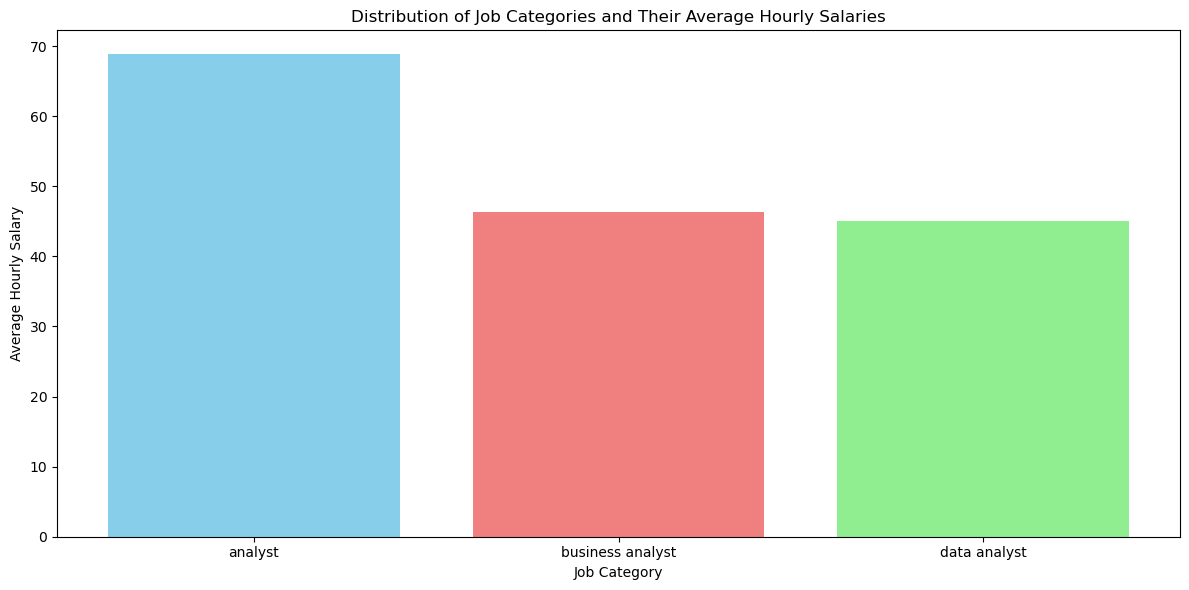

In [18]:
# Define a color scheme for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_category_hourly_salary.index, df_category_hourly_salary['Average hourly salary'], color=colors)
plt.xlabel('Job Category')
plt.ylabel('Average Hourly Salary')
plt.title('Distribution of Job Categories and Their Average Hourly Salaries')
plt.xticks()

# Show the plot
plt.tight_layout()
plt.show()

# Table 5: The distribution of companies and their average hourly salaries

In [30]:
# Determine the distribution of job companies and their average salaries.
df_company_hourly_salary = df_hour.groupby('Company name')['Average hourly salary'].mean().round(2)
df_company_hourly_salary = pd.DataFrame(df_company_hourly_salary)
df_company_hourly_salary = df_company_hourly_salary.sort_values('Average hourly salary', ascending=False)

# View dataframe.head()
df_company_hourly_salary.head(10)

,Average hourly salary
Company name,
Vibrant ABA,110.0
A+E Networks,100.0
Ascend Licensed Behavior Analyst PLLC,95.0
Achieve Beyond Pediatric Therapy & Autism Services,85.0
Vedainfo,80.0
Master It Behavior Therapy,79.0
Mondelēz International,78.0
St Mary's Healthcare System for Children,77.5
BigLynx Computer Software,75.0


In [20]:
# Merge DataFrames
df_tableau_job = df_job.merge(df_year, on=['Job title', 'Company name', 'Job description', 'Job location',\
       'Salary', 'Job type', 'Category'], how='left')

df_tableau_job = df_tableau_job.merge(df_hour, on=['Job title', 'Company name', 'Job description', 'Job location',\
       'Salary', 'Job type', 'Category'], how='left')

# Replace NaN values in 'Salary type_x' with values from 'Salary type_y'
df_tableau_job['Salary type_x'].fillna(df_tableau_job['Salary type_y'], inplace=True)

# Rename the 'Salary type_x' column to 'Salary type'
df_tableau_job.rename(columns={'Salary type_x': 'Salary type'}, inplace=True)

# Drop df_tableau_job['Salary type_y']
df_tableau_job.drop(columns='Salary type_y', inplace=True)

In [21]:
# Print the shape of the dataframe
print(df_tableau_job.shape)

# View dataframe
df_tableau_job.head()

(553, 10)


,Job title,Company name,Job description,Job location,Salary,Job type,Category,Salary type,Average annual salary,Average hourly salary
0,Data Analyst,Ramaz School,"Analyze, audit and modify data to assure data ...","New York, NY 10075 (Upper East Side area)",65000 - 75000 a year,Full-time,data analyst,year,70000.0,NaN
1,Program Data Support Analyst,Goodwin Recruiting,Load monthly reports to data processing tools ...,NaN,100000 - 150000 a year,NaN,analyst,year,125000.0,NaN
2,Program Data Support Analyst,Goodwin Recruiting,Load monthly reports to data processing tools ...,NaN,100000 - 150000 a year,NaN,analyst,year,125000.0,NaN
3,Jr SQL Dev/Dev Ops/BA/Data Engineering,VForce InfoTech,H1B TRANSFER AND GC FILING WITH THE BEST BILLI...,"Hybrid remote in Edison, NJ 08837",60000 - 100000 a year,Full-time,engineer,year,80000.0,NaN
4,Data Analyst,Columbia University,The successful candidate will be detail-orient...,"New York, NY",78000 - 80000 a year,Full-time,data analyst,year,79000.0,NaN


**Save dataset for data visualization in Tableau**

In [22]:
# Assuming 'data' is a subdirectory in your current working directory
folder_path = 'data/'
file_name = 'df_tableau_job.csv'

# Combine the folder path and file name to create the full file path
full_file_path = folder_path + file_name

# Export dataframe to csv file
df_tableau_job.to_csv(full_file_path, index=True)

# Table 6: The frequency of certain keywords in job descriptions.

In [31]:
# Analyze the frequency of certain keywords in job descriptions, and 
# Determine which skills and qualifications are most in demand.

# Copy df_job, store df3
df3 = df_job.copy()

# Define syncategorematic words, helping verbs, operators, indefinite_pronouns, demonstratives, alphabet, 
# personal_pronouns, and prepositions
syncategorematic_words = ['a', 'an', 'the', 'and', 'or', 'but', 'nor', 'for', 'yet', 'so',
                          'in', 'on', 'at', 'by', 'to', 'from', 'with', 'of', 'about', 'over',
                          'under', 'above', 'below', 'through', 'into', 'onto', 'upon',
                          'after', 'before', 'during', 'while', 'if', 'when', 'where', 'how',
                          'not', 'no', 'yes', 'only', 'too', 'also', 'very', 'much', 'even',
                          'as', 'than']
helping_verbs = ['be', 'am', 'is', 'are', 'was', 'were', 'being', 'been', 'have', 'has', 'had', 'do', 'does',\
                 'did', 'shall', 'will', 'should', 'would', 'may', 'might', 'must', 'can', 'cannot', 'could']
operators = ['+', '-', '*', '/']
indefinite_pronouns = ['all', 'another', 'any', 'anyone', 'anything', 'each', 'everybody', 'everyone',\
                       'everything', 'many', 'nobody', 'none', 'nothing', 'other', 'several', 'some',\
                       'someone', 'something']
demonstratives = ['this', 'that', 'these', 'those']
alphabet = [chr(i) for i in range(ord('a'), ord('z')+1)]
personal_pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'you', 'him', 'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'mine', 'yours', 'hers', 'ours', 'theirs']
prepositions = ['about', 'above', 'across', 'after', 'against', 'along', 'among',\
                'around', 'as', 'at', 'before', 'behind', 'below', 'beneath', 'beside',\
                'between', 'beyond', 'by', 'despite', 'down', 'during', 'except', 'for',\
                'from', 'in', 'inside', 'into', 'like', 'near', 'of', 'off', 'on', 'onto',\
                'out', 'outside', 'over', 'past', 'regarding', 'round', 'since', 'through',\
                'throughout', 'to', 'toward', 'under', 'underneath', 'until', 'unto', 'up',\
                'upon', 'with', 'within', 'without']

# Initialize an empty dictionary to store word frequencies
word_counts = {}

for description in df3['Job description']:
    # Check if the description is a string
    if isinstance(description, str):
        # Extract all words using regular expressions
        words = re.findall(r'\b\w+\b', description.lower())
    
        # Count the frequency of each word excluding syncategorematic words and helping verbs
        for word in words:
            if word not in syncategorematic_words and word not in helping_verbs\
            and word not in operators and word not in demonstratives\
            and word not in personal_pronouns and word not in indefinite_pronouns\
            and word not in alphabet and word not in prepositions:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1

# Create a DataFrame of word frequencies
df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency'])

# Sort the word frequencies in descending order
df_word_counts = df_word_counts.sort_values('Frequency', ascending=False)

# Adjust display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Dis1play the result
df_word_counts.head(20)

,Frequency
data,858
experience,207
years,165
business,133
analysis,117
analyze,104
5,92
3,88
analyst,80
management,59


**Save dataset for data visualization in Tableau**

In [24]:
# Assuming 'data' is a subdirectory in your current working directory
folder_path = 'data/'
file_name = 'df_word_counts.csv'

# Combine the folder path and file name to create the full file path
full_file_path = folder_path + file_name

# Export dataframe to csv file
df_word_counts.to_csv(full_file_path, index=True)

# III. Data Visualization: Tableau

**This is the link for you to view the Tableau Dashboard for this project: [Tableau Dashboard](https://public.tableau.com/app/profile/margaretnguyen/viz/ANALYSISOFDATAANALYSTJOBPOSTINGSINNEWYORK/Dashboard?publish=yes)**

# Title: Analysis of Data Analyst Job Postings in New York, NY

## I. Introduction

This report comprehensively analyzes job postings for data analyst positions in New York, NY (with some positions in New Jersey, NJ, due to the system's search for jobs near the specified location on Indeed.com). The data was collected from Indeed.com, a popular job search website, and provides valuable insights into the current job market and trends in the data analyst field. The collected data consists of 553 job postings and includes information such as job title, company name, job description, location, posting date, and salaries.

## II. Findings

**1. Identification of the top companies hiring data analysts in New York, NY**

Table 1 displays the companies that are hiring the most for data analyst positions in New York, NY. Leading the list is NYC Careers, which is currently seeking data analysts for 23 positions, highlighting a strong demand for analytical expertise. Fiserv, Inc. follows with 8 job openings, while Suburban Propane and Cognizant Technology Solutions each offer 7 opportunities. Other companies, such as Horizon Blue Cross Blue Shield of New Jersey, NYU Langone, InfoQuest Consulting Group Inc., ZT Systems, Zettalogix, and Hackensack Meridian Health, are also actively seeking data analysts, with 6 positions each. This data underscores the robust job market for data analysts in New York, NY, offering diverse opportunities across various sectors, including healthcare, technology, and finance. These companies all maintain a presence in New York, NY, indicating a vibrant job market for data analysts within the city. All these companies have a presence in New York, NY, suggesting that this city offers a vibrant job market for data analysts. 
    
**2. The distribution of job titles and companies about the average annual salaries**

According to the data presented in Table 2, the average annual salary range for data analytics jobs in New York, NY is notably wide, spanning from 64,900 dollars to 199,550 dollars. Among these positions, several roles command a high average annual salary exceeding 100,000 dollars. These lucrative roles include Business Intelligence Specialist, which offers an average annual salary of 199,550 dollars, followed by Data Strategist at 117,500 dollars, and Data Science Analyst at 109,615 dollars. Additionally, Business Intelligence Analyst, Business Intelligence, Engineer, Systems Analyst, IT Business Analyst, Business Analyst, and Data Analyst positions also provide competitive salaries ranging from 100,921.67 dollars to 99,625.08 dollars. On the other hand, there are data analytics roles with comparatively lower average annual salaries, such as IT Analyst at 70,618.50 dollars, Research Analyst at 68,367.50 dollars, and Sales Analyst at 64,900 dollars. It is worth noting that these salary ranges are relatively high compared to the average annual salary in the job market, particularly considering the significant number of company layoffs occurring.

Furthermore, Table 3 reveals insights into companies offering substantial salaries for data analytics positions in New York, NY. Prominent among these employers are TD Witz Associates, providing an impressive average salary of 200,000 dollars. Duolingo follows closely with an average salary of 199,550 dollars, while Treliant LLC offers competitive compensation at 195,000 dollars. Meta and Citi also present attractive opportunities, with average salaries of 175,500 dollars and 172,015 dollars, respectively. Inclusively, Dandy, Walmart, BNP Paribas, NewYork-Presbyterian Hospital, and Facebook App are other companies worth mentioning for their data analytics roles, with salaries ranging from 165,000 dollars to 154,750 dollars. This diverse set of companies represents various industries, including technology (Meta), finance (Citi, BNP Paribas), healthcare (NewYork-Presbyterian Hospital), and social media (Facebook App). These substantial salaries underscore the competitive landscape for data analysts in New York, NY, making it an enticing destination for professionals in the field.

**3. The distribution of job titles and companies about the average hourly salaries**

Based on the data presented in Table 4, the average hourly salary range for data analytics jobs in New York, NY spans from 45.10 dollars to 68.82 dollars. Several positions command high average hourly salaries exceeding 50 dollars, with the "analyst" category leading at 68.82 dollars, followed by "business analyst" at 46.29 dollars. "Data analyst" positions offer an average hourly salary of 45.10 dollars.

Additionally, Table 5 highlights companies in New York, NY, that provide competitive hourly salaries for data analytics roles. Vibrant ABA offers the highest hourly wage at 110.00 dollars, followed by A+E Networks at 100.00 dollars and Ascend Licensed Behavior Analyst PLLC at 95.00 dollars. Achieve Beyond Pediatric Therapy & Autism Services, Vedainfo, Master It Behavior Therapy, and Mondeléz International are among the companies offering attractive hourly salaries, ranging from 80.00 dollars to 79.00 dollars. St Mary's Healthcare System for Children, BigLynx Computer Software, and ASun Star Consulting, Inc. are also noteworthy, with hourly wages ranging from 77.50 dollars to 72.50 dollars.

**4. Skills and qualifications are most in demand for data analysts**

Table 6 reveals that the term "data" is highly prevalent, indicating a significant focus on working with data, which encompasses various activities, including data analysis, data management, and data-driven decision-making. The term "experience" appears second most frequently, suggesting that companies are seeking a data analytics professional with prior experience. Phrases like "skills" and "analysis" signify a broad emphasis on candidates' qualifications and abilities. Employers may prioritize technical proficiencies like PowerBI and SQL, as these skills are highly valued in the data analytics domain. The keyword "business" implies a need for candidates who grasp the business context in which they will operate, demonstrating business acumen and the ability to align analytical insights with business objectives. The frequent appearance of the term "work" suggests that employers highly value candidates with a strong work ethic, initiative, and a track record of delivering results. Finally, the term "management" hints at a requirement for applicants capable of effectively managing projects, teams, or resources.

## III. Conclusion

In conclusion, the analysis of data analyst job postings in New York, NY indicates a thriving labor market with opportunities across various industries. Companies such as NYC Careers, Fiserv, Inc., Suburban Propane, and Cognizant Technology Solutions are leading in hiring data analysts. The average annual salaries for data analytics jobs in the city are generally high with some roles offering high salaries exceeding 100,000 dollars. Business Intelligence Specialist stands out with an average annual salary of 199,550 dollars, indicating the potential for significant earnings in this field. Furthermore, a range of companies, including TD Witz Associates and Duolingo, offer competitive salaries, making New York, NY an attractive destination for data analysts. In terms of hourly rates, salaries range from 45.10 to 68.82 dollars. Companies offering high hourly wages include Vibrant ABA, A+E Networks, and Ascend Licensed Behavior Analyst PLLC. Employers seek candidates with a strong emphasis on working with data and skills in data analysis and management. This analysis demonstrates the demand for skilled data analysts in New York, NY and provides valuable insights for job seekers, employers, or policymakers.